**Importing necessary libraries**

In [41]:
!pip install -q catboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Reading the dataset**

In [42]:
df = pd.read_csv ('/content/drive/MyDrive/projects/games dataset.csv', encoding ='latin1')
df.head(3)

,game_id,nickname,total_turns,first_five_turns_points,max_points_turn,min_points_turn,max_min_difference,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,time_used
0,1,BetterBot,13,122,68,8,60,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,0.562370
1,1,stevy,14,95,98,2,96,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,0.562370
2,2,BetterBot,12,167,85,8,77,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418,0.101171


**Checking the data types of columns**

In [43]:
df.dtypes

game_id                      int64
nickname                    object
total_turns                  int64
first_five_turns_points      int64
max_points_turn              int64
min_points_turn              int64
max_min_difference           int64
first                       object
time_control_name           object
game_end_reason             object
winner                       int64
created_at                  object
lexicon                     object
initial_time_seconds         int64
increment_seconds            int64
rating_mode                 object
max_overtime_minutes         int64
game_duration_seconds      float64
time_used                  float64
dtype: object

**Checking shape of the dataset**

In [44]:
df.shape

(145546, 19)

**Looking for missing values**

In [45]:
df.isnull().sum()

game_id                    0
nickname                   0
total_turns                0
first_five_turns_points    0
max_points_turn            0
min_points_turn            0
max_min_difference         0
first                      0
time_control_name          0
game_end_reason            0
winner                     0
created_at                 0
lexicon                    0
initial_time_seconds       0
increment_seconds          0
rating_mode                0
max_overtime_minutes       0
game_duration_seconds      0
time_used                  0
dtype: int64

**Checking for and removing duplicates**

In [46]:
print (df.shape)
df = df.drop_duplicates()
print (df.shape)

(145546, 19)
(145546, 19)


**There are no duplicates**

**Statistical distribution of numerical columns**

In [47]:
df.describe()

,game_id,total_turns,first_five_turns_points,max_points_turn,min_points_turn,max_min_difference,winner,initial_time_seconds,increment_seconds,max_overtime_minutes,game_duration_seconds,time_used
count,145546.000000,145546.000000,145546.000000,145546.000000,145546.000000,145546.000000,145546.000000,145546.000000,145546.000000,145546.000000,145546.000000,145546.000000
mean,36387.000000,13.779135,126.507997,76.016984,3.101267,72.915717,0.350734,1198.034230,0.228560,2.143707,484.069347,0.479757
std,21007.827737,2.068726,51.864258,18.731645,15.217119,24.123108,0.484857,713.182769,2.548011,2.989843,333.561982,0.326046
min,1.000000,9.000000,-120.000000,0.000000,-221.000000,0.000000,-1.000000,15.000000,0.000000,0.000000,7.962989,0.002212
25%,18194.000000,12.000000,89.000000,69.000000,0.000000,62.000000,0.000000,900.000000,0.000000,1.000000,250.172459,0.255399
50%,36387.000000,14.000000,122.000000,77.000000,5.000000,71.000000,0.000000,1200.000000,0.000000,1.000000,399.834150,0.392396
75%,54580.000000,15.000000,159.000000,85.000000,10.000000,81.000000,1.000000,1200.000000,0.000000,1.000000,633.424285,0.620039
max,72773.000000,50.000000,457.000000,311.000000,43.000000,442.000000,1.000000,3600.000000,60.000000,10.000000,4444.821645,6.156379


**Looking for uniques items and their quantities in all categorical columns**

In [48]:
df.nickname.value_counts()

STEEBot         24916
BetterBot       24244
HastyBot        23613
BB-8             6576
hannahbanana     1884
                ...  
jopert              1
wongelvan           1
Thejana123          1
ARLONG573           1
kacattac            1
Name: nickname, Length: 1471, dtype: int64

In [49]:
df['first'].value_counts()

STEEBot         24420
BetterBot       24028
HastyBot        23264
BB-8             6576
hannahbanana     2016
                ...  
Anita_H             2
Sokhim1             2
jvp                 2
Anbu                2
kacattac            2
Name: first, Length: 1314, dtype: int64

In [50]:
df['time_control_name'].value_counts()

regular       120564
rapid          13304
blitz           8936
ultrablitz      2742
Name: time_control_name, dtype: int64

In [51]:
df['game_end_reason'].value_counts()

STANDARD              135974
RESIGNED                4692
TIME                    4404
CONSECUTIVE_ZEROES       476
Name: game_end_reason, dtype: int64

In [52]:
df['lexicon'].value_counts()

CSW21     89188
NWL20     42500
ECWL      13850
NSWL20        8
Name: lexicon, dtype: int64

In [53]:
df['rating_mode'].value_counts()

RATED     108152
CASUAL     37394
Name: rating_mode, dtype: int64

In [54]:
df['created_at'].value_counts()

2022-09-20 15:59:19    6
2022-09-09 14:37:13    6
2022-09-03 14:28:52    4
2022-08-15 16:20:21    4
2022-09-16 07:50:26    4
                      ..
2022-09-05 00:19:58    2
2022-09-07 00:07:05    2
2022-09-07 23:42:39    2
2022-08-30 16:28:12    2
2022-08-27 09:13:08    2
Name: created_at, Length: 72194, dtype: int64

**The column "created_at" is a date-time column. Neither it provides any useful information in this case nor we are doing time-series forecasting, so it's better to drop it from the dataset. Furthermore, the column "game_id" has all unique entries so it's essentialy sort of like a index column and therefore useless. Dropping both columns from the dataset**

In [55]:
df = df.drop (['created_at', 'game_id'], axis =1)

In [56]:
df.head(1)

,nickname,total_turns,first_five_turns_points,max_points_turn,min_points_turn,max_min_difference,first,time_control_name,game_end_reason,winner,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,time_used
0,BetterBot,13,122,68,8,60,BetterBot,regular,STANDARD,1,NWL20,1200,0,CASUAL,1,674.844274,0.56237


In [57]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 11 numerical features : ['total_turns', 'first_five_turns_points', 'max_points_turn', 'min_points_turn', 'max_min_difference', 'winner', 'initial_time_seconds', 'increment_seconds', 'max_overtime_minutes', 'game_duration_seconds', 'time_used']

We have 6 categorical features : ['nickname', 'first', 'time_control_name', 'game_end_reason', 'lexicon', 'rating_mode']


In [58]:
print("Categories in the variable 'nickname':",end=" " )
print(df['nickname'].nunique())

print("Categories in the variable 'first':",end=" ")
print(df['first'].nunique())

print("Categories in the variable 'time control name':",end=" " )
print(df['time_control_name'].nunique())

print("Categories in the variable 'game end reason':",end=" " )
print(df['game_end_reason'].nunique())

print("Categories in the variable 'lexicon':",end=" " )
print(df['lexicon'].nunique())

print("Categories in the variable 'rating mode':",end=" " )
print(df['rating_mode'].nunique())

Categories in the variable 'nickname': 1471
Categories in the variable 'first': 1314
Categories in the variable 'time control name': 4
Categories in the variable 'game end reason': 4
Categories in the variable 'lexicon': 4
Categories in the variable 'rating mode': 2


**Since there are a lot of unique categories in the categorical columns therefore one-hot encoding is not suitable in this case.**

In [59]:
df.dtypes

nickname                    object
total_turns                  int64
first_five_turns_points      int64
max_points_turn              int64
min_points_turn              int64
max_min_difference           int64
first                       object
time_control_name           object
game_end_reason             object
winner                       int64
lexicon                     object
initial_time_seconds         int64
increment_seconds            int64
rating_mode                 object
max_overtime_minutes         int64
game_duration_seconds      float64
time_used                  float64
dtype: object

**Using label encoder on categorical columns**

In [60]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder ()
df.iloc [:, 0] = labelencoder.fit_transform (df.iloc [:,0])
df.iloc [:, 6] = labelencoder.fit_transform (df.iloc [:,6])
df.iloc [:, 7] = labelencoder.fit_transform (df.iloc [:,7])
df.iloc [:, 8] = labelencoder.fit_transform (df.iloc [:,8])
df.iloc [:, 10] = labelencoder.fit_transform (df.iloc [:,10])
df.iloc [:, 13] = labelencoder.fit_transform (df.iloc [:,13])

In [61]:
df.head(1)

,nickname,total_turns,first_five_turns_points,max_points_turn,min_points_turn,max_min_difference,first,time_control_name,game_end_reason,winner,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,time_used
0,110,13,122,68,8,60,92,2,2,1,3,1200,0,0,1,674.844274,0.56237


**Plotting box plots**

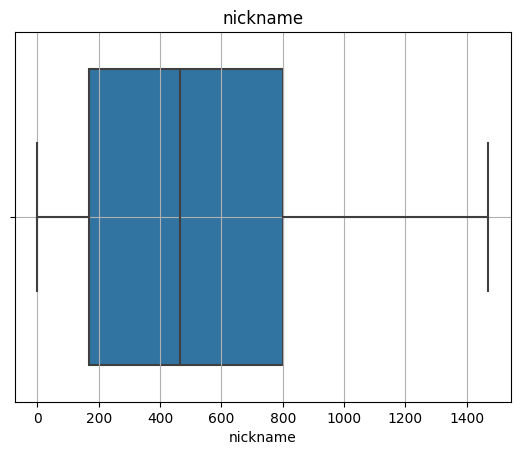

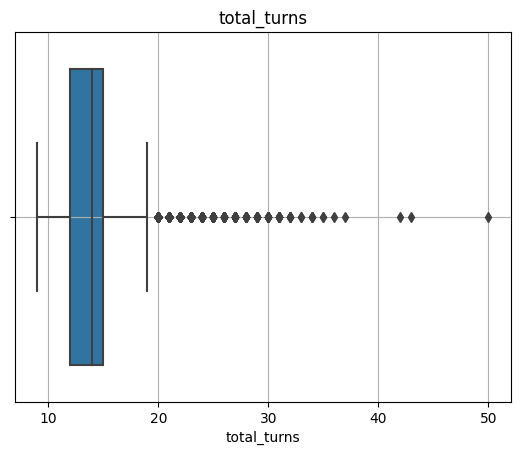

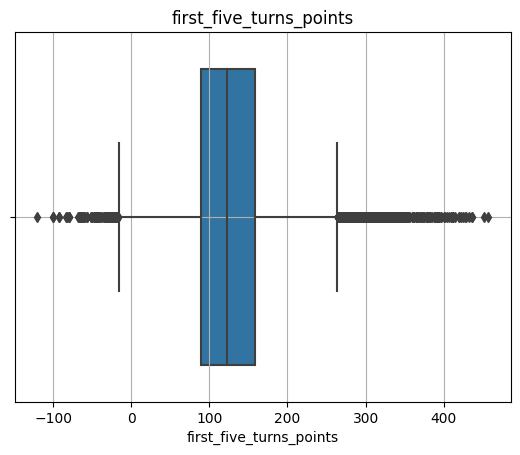

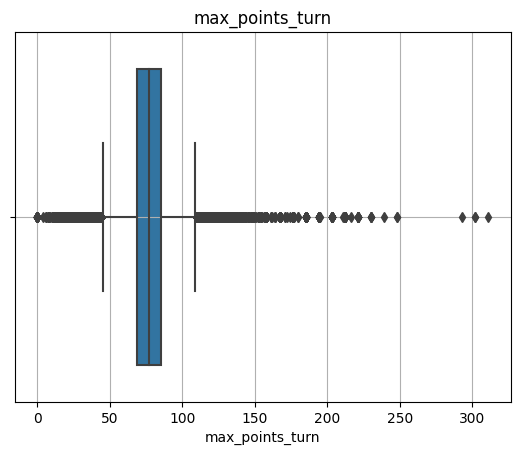

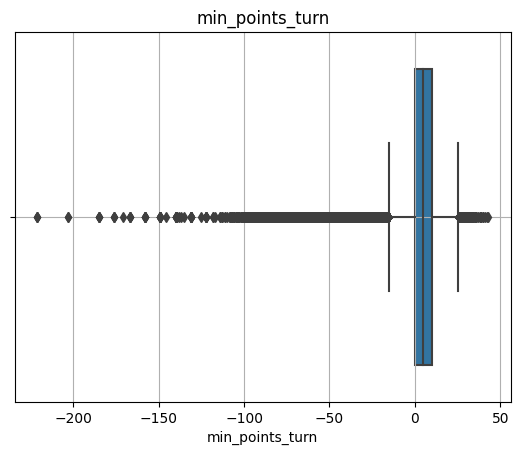

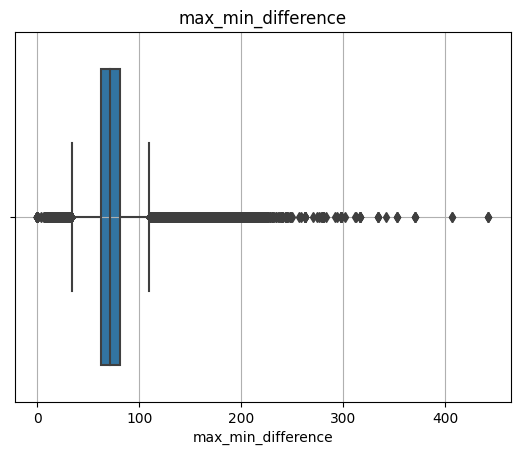

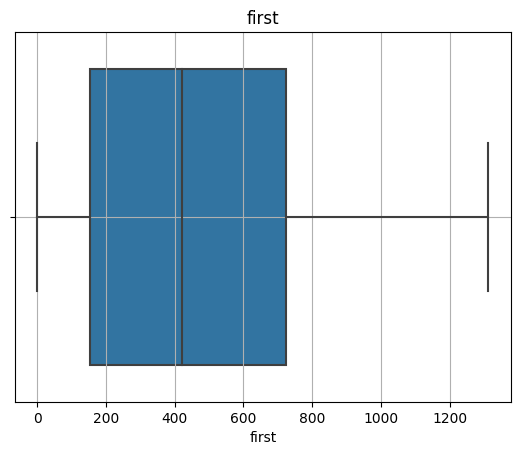

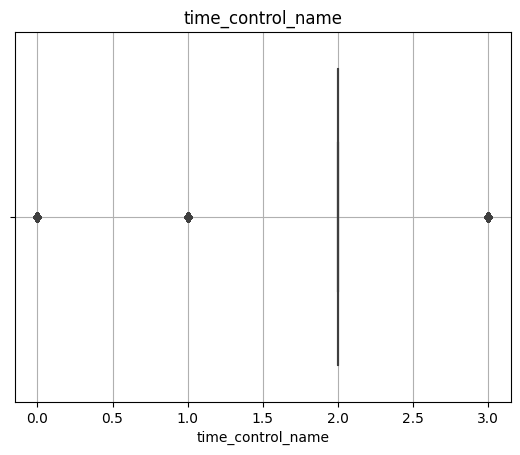

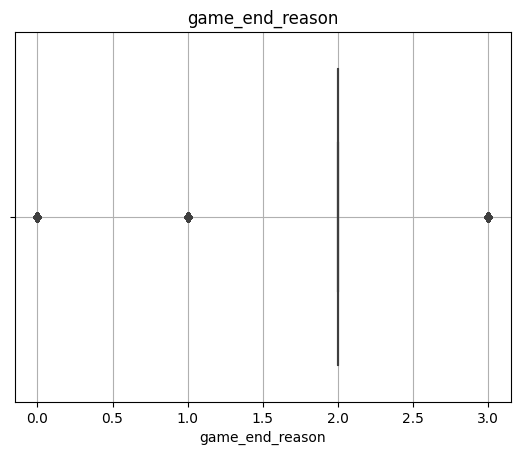

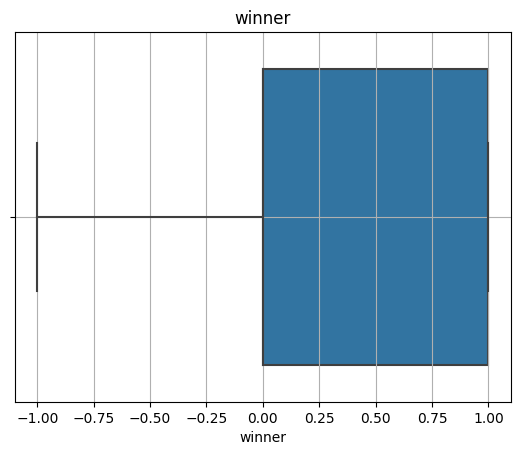

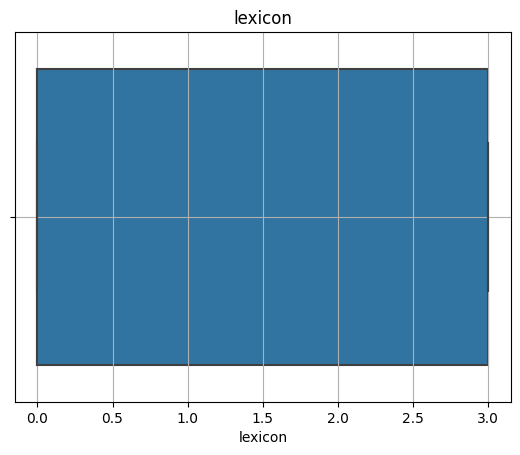

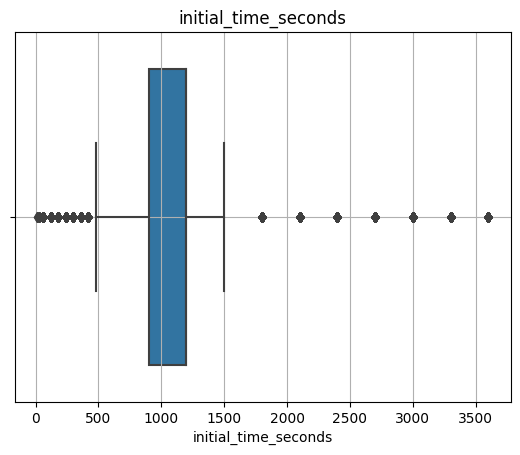

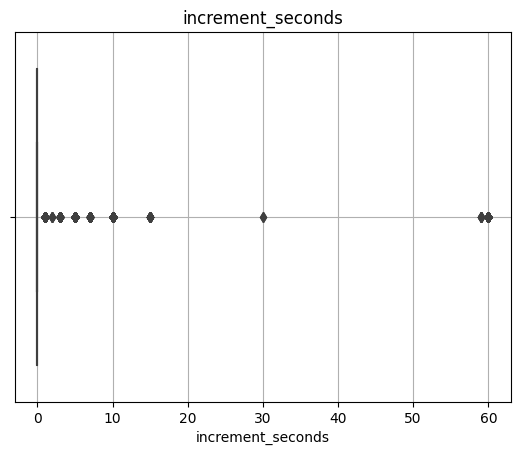

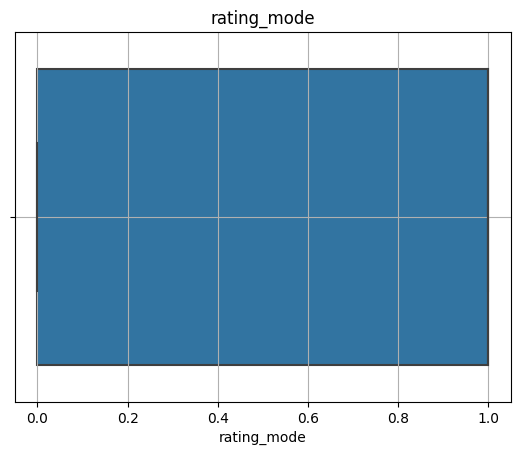

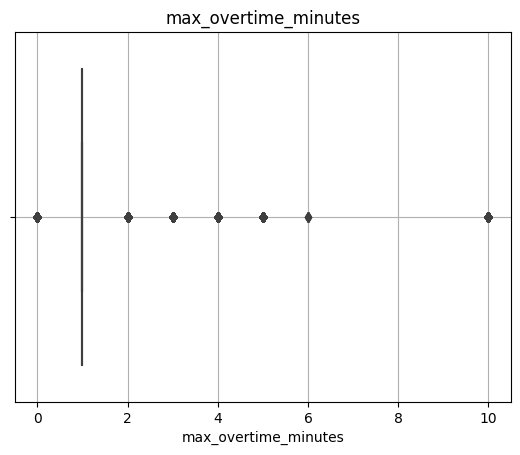

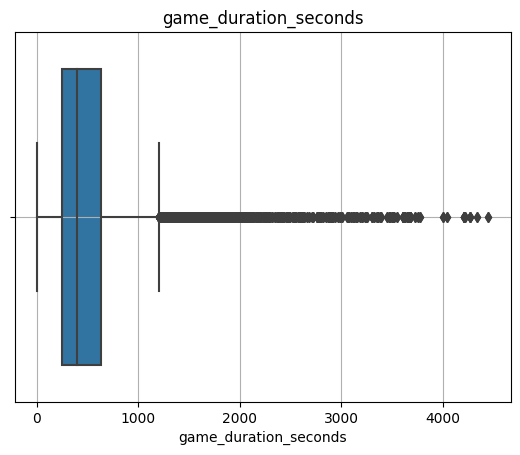

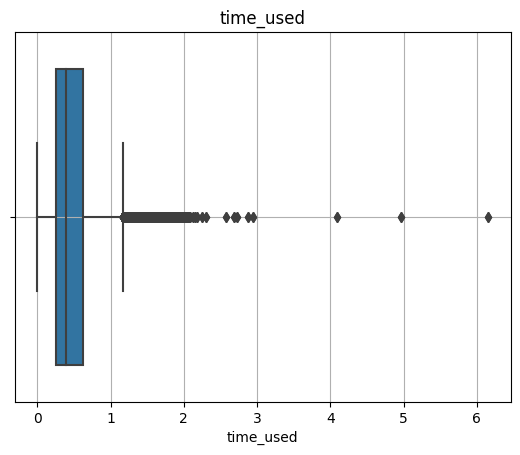

In [62]:
for col in df.columns:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.grid()
    plt.show()

In [63]:
df['increment_seconds'].value_counts()

0     141104
1       1732
5       1138
10      1104
60       214
3        120
7         92
15        28
59         8
2          4
30         2
Name: increment_seconds, dtype: int64

**The "increment seconds" column contains values that occur infrequently. In a standard train-test split, this can lead to uneven data distribution between the two sets. Stratifying based on this column helps maintain equal data distribution, ensuring a more balanced and reliable evaluation of our model.**

In [64]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state =0)

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits =1, test_size =0.2, random_state=0)

for train_index, test_index in split.split(df, df['increment_seconds']):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc [test_index]

**Preparing x_train, x_test, y_train and y_test**

In [65]:
x_train = strat_train_set.drop('time_used', axis=1)
y_train = strat_train_set['time_used']

x_test = strat_test_set.drop('time_used', axis=1)
y_test = strat_test_set['time_used']

In [66]:
print (x_train.shape, x_test.shape)

(116436, 16) (29110, 16)


**Random Forest Regressor Results**

In [67]:
rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(x_train, y_train)

y_pred_train_rfr = rfr.predict (x_train)
y_pred_test_rfr = rfr.predict (x_test)

score_train_rfr = r2_score (y_train, y_pred_train_rfr)
print ("R2 score train rfr:", score_train_rfr)

score_test_rfr = r2_score (y_test, y_pred_test_rfr)
print ("R2 score test rfr:", score_test_rfr)

MAE_train_rfr = mean_absolute_error (y_train, y_pred_train_rfr)
print ('Mean Absolute Error Train RFR:', MAE_train_rfr)

MAE_test_rfr = mean_absolute_error (y_test, y_pred_test_rfr)
print ('Mean Absolute Error Test RFR:', MAE_test_rfr)

MSE_train_rfr = mean_squared_error (y_train, y_pred_train_rfr)
print ('Mean Squared Error Train RFR:', MSE_train_rfr)

MSE_test_rfr = mean_squared_error (y_test, y_pred_test_rfr)
print ('Mean Squared Error Test RFR:', MSE_test_rfr)

RMSE_train_rfr = np.sqrt (mean_squared_error (y_train, y_pred_train_rfr))
print ('Root Mean Squared Error Train RFR:', RMSE_train_rfr)

RMSE_test_rfr = np.sqrt (mean_squared_error (y_test, y_pred_test_rfr))
print ('Root Mean Squared Error Test RFR:', RMSE_test_rfr)

R2 score train rfr: 0.9997641346708191
R2 score test rfr: 0.99962376194006
Mean Absolute Error Train RFR: 0.00017816529210483442
Mean Absolute Error Test RFR: 0.00041272651577783893
Mean Squared Error Train RFR: 2.50028202529363e-05
Mean Squared Error Test RFR: 4.044734023417196e-05
Root Mean Squared Error Train RFR: 0.0050002820173402525
Root Mean Squared Error Test RFR: 0.00635982234297248


**Adaboost Regressor Results**

In [68]:
adb = AdaBoostRegressor(n_estimators=10)
adb.fit(x_train, y_train)

y_pred_train_adb = adb.predict (x_train)
y_pred_test_adb = adb.predict (x_test)

score_train_adb = r2_score (y_train, y_pred_train_adb)
print ("R2 score train adb:", score_train_adb)

score_test_adb = r2_score (y_test, y_pred_test_adb)
print ("R2 score test adb:", score_test_adb)

MAE_train_adb = mean_absolute_error (y_train, y_pred_train_adb)
print ('Mean Absolute Error Train adb:', MAE_train_adb)

MAE_test_adb = mean_absolute_error (y_test, y_pred_test_adb)
print ('Mean Absolute Error Test adb:', MAE_test_adb)

MSE_train_adb = mean_squared_error (y_train, y_pred_train_adb)
print ('Mean Squared Error Train adb:', MSE_train_adb)

MSE_test_adb = mean_squared_error (y_test, y_pred_test_adb)
print ('Mean Squared Error Test adb:', MSE_test_adb)

RMSE_train_adb = np.sqrt (mean_squared_error (y_train, y_pred_train_adb))
print ('Root Mean Squared Error Train adb:', RMSE_train_adb)

RMSE_test_adb = np.sqrt (mean_squared_error (y_test, y_pred_test_adb))
print ('Root Mean Squared Error Test adb:', RMSE_test_adb)

R2 score train adb: 0.7748954909989341
R2 score test adb: 0.7760802437120454
Mean Absolute Error Train adb: 0.12093623728271581
Mean Absolute Error Test adb: 0.1219224230393073
Mean Squared Error Train adb: 0.023862123340578766
Mean Squared Error Test adb: 0.02407241460147467
Root Mean Squared Error Train adb: 0.15447369789248513
Root Mean Squared Error Test adb: 0.15515287493783242


**Catboost Regressor Results**

In [69]:
cbr = CatBoostRegressor(n_estimators=10)
cbr.fit(x_train, y_train)

y_pred_train_cbr = cbr.predict (x_train)
y_pred_test_cbr = cbr.predict (x_test)

score_train_cbr = r2_score (y_train, y_pred_train_cbr)
print ("R2 score train cbr:", score_train_cbr)

score_test_cbr = r2_score (y_test, y_pred_test_cbr)
print ("R2 score test cbr:", score_test_cbr)

MAE_train_cbr = mean_absolute_error (y_train, y_pred_train_cbr)
print ('Mean Absolute Error Train cbr:', MAE_train_cbr)

MAE_test_cbr = mean_absolute_error (y_test, y_pred_test_cbr)
print ('Mean Absolute Error Test cbr:', MAE_test_cbr)

MSE_train_cbr = mean_squared_error (y_train, y_pred_train_cbr)
print ('Mean Squared Error Train cbr:', MSE_train_cbr)

MSE_test_cbr = mean_squared_error (y_test, y_pred_test_cbr)
print ('Mean Squared Error Test cbr:', MSE_test_cbr)

RMSE_train_cbr = np.sqrt (mean_squared_error (y_train, y_pred_train_cbr))
print ('Root Mean Squared Error Train cbr:', RMSE_train_cbr)

RMSE_test_cbr = np.sqrt (mean_squared_error (y_test, y_pred_test_cbr))
print ('Root Mean Squared Error Test cbr:', RMSE_test_cbr)

Learning rate set to 0.5
0:	learn: 0.2016256	total: 20.3ms	remaining: 183ms
1:	learn: 0.1336190	total: 56.3ms	remaining: 225ms
2:	learn: 0.0972464	total: 95.7ms	remaining: 223ms
3:	learn: 0.0776689	total: 134ms	remaining: 201ms
4:	learn: 0.0662673	total: 178ms	remaining: 178ms
5:	learn: 0.0594263	total: 216ms	remaining: 144ms
6:	learn: 0.0539863	total: 253ms	remaining: 108ms
7:	learn: 0.0489480	total: 291ms	remaining: 72.8ms
8:	learn: 0.0462946	total: 328ms	remaining: 36.5ms
9:	learn: 0.0435308	total: 363ms	remaining: 0us
R2 score train cbr: 0.9821241021765695
R2 score test cbr: 0.9828222552740957
Mean Absolute Error Train cbr: 0.028408320271347286
Mean Absolute Error Test cbr: 0.028397683757219752
Mean Squared Error Train cbr: 0.0018949281850425327
Mean Squared Error Test cbr: 0.001846687401840961
Root Mean Squared Error Train cbr: 0.04353077285142699
Root Mean Squared Error Test cbr: 0.04297310091023175


**Gradient Boosting Regressor Results**

In [70]:
gbr = GradientBoostingRegressor(n_estimators=10)
gbr.fit(x_train, y_train)

y_pred_train_gbr = gbr.predict (x_train)
y_pred_test_gbr = gbr.predict (x_test)

score_train_gbr = r2_score (y_train, y_pred_train_gbr)
print ("R2 score train gbr:", score_train_gbr)

score_test_gbr = r2_score (y_test, y_pred_test_gbr)
print ("R2 score test gbr:", score_test_gbr)

MAE_train_gbr = mean_absolute_error (y_train, y_pred_train_gbr)
print ('Mean Absolute Error Train gbr:', MAE_train_gbr)

MAE_test_gbr = mean_absolute_error (y_test, y_pred_test_gbr)
print ('Mean Absolute Error Test gbr:', MAE_test_gbr)

MSE_train_gbr = mean_squared_error (y_train, y_pred_train_gbr)
print ('Mean Squared Error Train gbr:', MSE_train_gbr)

MSE_test_gbr = mean_squared_error (y_test, y_pred_test_gbr)
print ('Mean Squared Error Test gbr:', MSE_test_gbr)

RMSE_train_gbr = np.sqrt (mean_squared_error (y_train, y_pred_train_gbr))
print ('Root Mean Squared Error Train gbr:', RMSE_train_gbr)

RMSE_test_gbr = np.sqrt (mean_squared_error (y_test, y_pred_test_gbr))
print ('Root Mean Squared Error Test gbr:', RMSE_test_gbr)

R2 score train gbr: 0.7007687871208856
R2 score test gbr: 0.7040292840845461
Mean Absolute Error Train gbr: 0.1313707284869479
Mean Absolute Error Test gbr: 0.13209751482944718
Mean Squared Error Train gbr: 0.03171989819643549
Mean Squared Error Test gbr: 0.0318182276612068
Root Mean Squared Error Train gbr: 0.17810080908416864
Root Mean Squared Error Test gbr: 0.17837664550385177


**Linear Regression Results**

In [71]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred_train_lr = lr.predict (x_train)
y_pred_test_lr = lr.predict (x_test)

score_train_lr = r2_score (y_train, y_pred_train_lr)
print ("R2 score train lr:", score_train_lr)

score_test_lr = r2_score (y_test, y_pred_test_lr)
print ("R2 score test lr:", score_test_lr)

MAE_train_lr = mean_absolute_error (y_train, y_pred_train_lr)
print ('Mean Absolute Error Train lr:', MAE_train_lr)

MAE_test_lr = mean_absolute_error (y_test, y_pred_test_lr)
print ('Mean Absolute Error Test lr:', MAE_test_lr)

MSE_train_lr = mean_squared_error (y_train, y_pred_train_lr)
print ('Mean Squared Error Train lr:', MSE_train_lr)

MSE_test_lr = mean_squared_error (y_test, y_pred_test_lr)
print ('Mean Squared Error Test lr:', MSE_test_lr)

RMSE_train_lr = np.sqrt (mean_squared_error (y_train, y_pred_train_lr))
print ('Root Mean Squared Error Train lr:', RMSE_train_lr)

RMSE_test_lr = np.sqrt (mean_squared_error (y_test, y_pred_test_lr))
print ('Root Mean Squared Error Test lr:', RMSE_test_lr)

R2 score train lr: 0.5251029510280433
R2 score test lr: 0.5265659336605318
Mean Absolute Error Train lr: 0.13869111889686186
Mean Absolute Error Test lr: 0.13968823312281253
Mean Squared Error Train lr: 0.050341292615298294
Mean Squared Error Test lr: 0.05089636269847445
Root Mean Squared Error Train lr: 0.22436865337051495
Root Mean Squared Error Test lr: 0.22560222228177287


**XGBOOST Regressor Results**

In [72]:
xgb = XGBRegressor(n_estimators=10)
xgb.fit(x_train, y_train)

y_pred_train_xgb = xgb.predict (x_train)
y_pred_test_xgb = xgb.predict (x_test)

score_train_xgb = r2_score (y_train, y_pred_train_xgb)
print ("R2 score train xgb:", score_train_xgb)

score_test_xgb = r2_score (y_test, y_pred_test_xgb)
print ("R2 score test xgb:", score_test_xgb)

MAE_train_xgb = mean_absolute_error (y_train, y_pred_train_xgb)
print ('Mean Absolute Error Train xgb:', MAE_train_xgb)

MAE_test_xgb = mean_absolute_error (y_test, y_pred_test_xgb)
print ('Mean Absolute Error Test xgb:', MAE_test_xgb)

MSE_train_xgb = mean_squared_error (y_train, y_pred_train_xgb)
print ('Mean Squared Error Train xgb:', MSE_train_xgb)

MSE_test_xgb = mean_squared_error (y_test, y_pred_test_xgb)
print ('Mean Squared Error Test xgb:', MSE_test_xgb)

RMSE_train_xgb = np.sqrt (mean_squared_error (y_train, y_pred_train_xgb))
print ('Root Mean Squared Error Train xgb:', RMSE_train_xgb)

RMSE_test_xgb = np.sqrt (mean_squared_error (y_test, y_pred_test_xgb))
print ('Root Mean Squared Error Test xgb:', RMSE_test_xgb)

R2 score train xgb: 0.995297680594386
R2 score test xgb: 0.9946128028615616
Mean Absolute Error Train xgb: 0.014508099114309541
Mean Absolute Error Test xgb: 0.01471621587994531
Mean Squared Error Train xgb: 0.0004984676945899307
Mean Squared Error Test xgb: 0.000579148732591496
Root Mean Squared Error Train xgb: 0.02232639009311471
Root Mean Squared Error Test xgb: 0.02406550919036404


**Decision Tree Regressor Results**

In [73]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

y_pred_train_dtr = dtr.predict (x_train)
y_pred_test_dtr = dtr.predict (x_test)

score_train_dtr = r2_score (y_train, y_pred_train_dtr)
print ("R2 score train dtr:", score_train_dtr)

score_test_dtr = r2_score (y_test, y_pred_test_dtr)
print ("R2 score test dtr:", score_test_dtr)

MAE_train_dtr = mean_absolute_error (y_train, y_pred_train_dtr)
print ('Mean Absolute Error Train dtr:', MAE_train_dtr)

MAE_test_dtr = mean_absolute_error (y_test, y_pred_test_dtr)
print ('Mean Absolute Error Test dtr:', MAE_test_dtr)

MSE_train_dtr = mean_squared_error (y_train, y_pred_train_dtr)
print ('Mean Squared Error Train dtr:', MSE_train_dtr)

MSE_test_dtr = mean_squared_error (y_test, y_pred_test_dtr)
print ('Mean Squared Error Test dtr:', MSE_test_dtr)

RMSE_train_dtr = np.sqrt (mean_squared_error (y_train, y_pred_train_dtr))
print ('Root Mean Squared Error Train dtr:', RMSE_train_dtr)

RMSE_test_dtr = np.sqrt (mean_squared_error (y_test, y_pred_test_dtr))
print ('Root Mean Squared Error Test dtr:', RMSE_test_dtr)

R2 score train dtr: 1.0
R2 score test dtr: 0.9978156716451814
Mean Absolute Error Train dtr: 1.3630735478842001e-11
Mean Absolute Error Test dtr: 0.0004244531168305361
Mean Squared Error Train dtr: 1.5465291646251851e-19
Mean Squared Error Test dtr: 0.0002348254511108532
Root Mean Squared Error Train dtr: 3.9325935012726463e-10
Root Mean Squared Error Test dtr: 0.015324015502173483


**Based on above results random forest regressor is giving the best results**

**Making predictions**

In [74]:
input_data = (770, 11, 118, 76, 0, 76, 260, 2, 2, 0, 0, 900, 0, 1, 1, 564.97283)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = rfr.predict(input_data_reshaped)[0]
print('This game will be played for {} hours.'.format(prediction.round(2)))

This game will be played for 0.63 hours.


**Creating the dataset for comparison of actual and predicted time**

In [75]:
comparison_df = pd.DataFrame ({'Actual Time': y_test,
                               'Predicted Time': y_pred_test_rfr,
                               'Difference': y_test-y_pred_test_rfr})

comparison_df.head(5)

,Actual Time,Predicted Time,Difference
130482,0.446519,0.446536,-0.000017
94993,0.262474,0.262249,0.000224
50202,0.494085,0.494096,-0.000011
133089,0.110724,0.110769,-0.000046
75751,0.848301,0.848308,-0.000007


**Plotting the graph of actual and predicted values**

Text(0.5, 1.0, 'Actual Time vs Predicted Time')

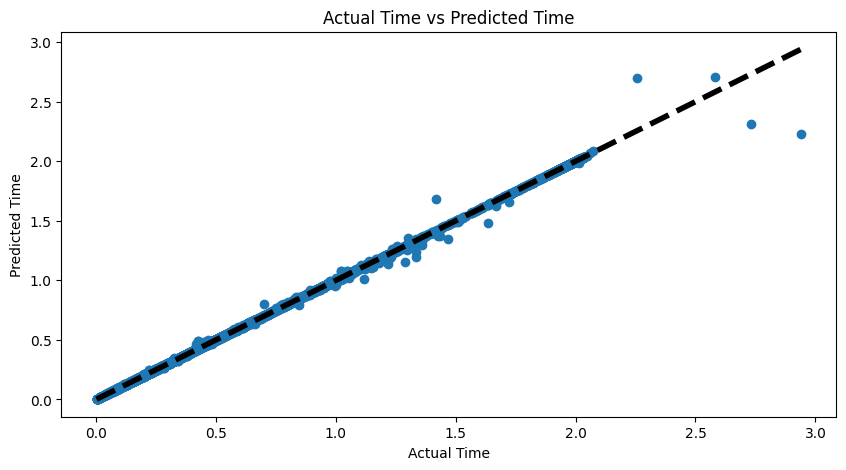

In [76]:
plt.figure(figsize =(10,5))
plt.scatter(y_test, y_pred_test_rfr)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=4)

plt.xlabel('Actual Time')
plt.ylabel('Predicted Time')
plt.title('Actual Time vs Predicted Time')